In [7]:
#import Liberaries
import pydicom as dicom
import matplotlib.pyplot as plt 
import numpy as np
import SimpleITK as sitk
import glob
import cv2 
from skimage import exposure
import time
import psutil
import tracemalloc

In [8]:
#Load The images
path = glob.glob("*.dcm")
cv_img = []
for img in path:
    n = dicom.read_file(img)
    img2 = n.pixel_array
    cv_img.append(n)

In [14]:

#print('The CPU usage is: ', psutil.cpu_percent(1)) #for CPU
#tracemalloc.start() #for ram

start = time.time()

#image equalization
def histogram_equalize(img):
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    new_image = np.interp(img, bin_centers, img_cdf)
    return new_image

test_orgi = []
hist_orgi = []
for image in cv_img:
    img = image.pixel_array
    test_orgi.append(img)
    imagess = histogram_equalize(img)
    hist_orgi.append(imagess)
    
#-1,1 normalization
normalized_histo2 = []
for image in hist_orgi:
    img2 = image
    n_dicom_img = (2 *((img2 - img2.min()) / ( img2.max() - img2.min())) - 1)
    normalized_histo2.append(n_dicom_img)

#original Means
means = []
for image in normalized_histo2:
    means.append(image.mean())
    
new = []
original_copy = normalized_histo2
for image in original_copy:
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            if image[i,j] < 0:
                image[i,j] = image[i,j] * 0.9
            if image[i,j] > 0:
                image[i,j] = image[i,j] * 0.8
    new.append(image.mean())


#sorted values
means.sort()
new.sort()
print(means)
print(new)

end = time.time()
print("Time :  ", end - start)

#print(tracemalloc.get_traced_memory()) #for ram
#tracemalloc.stop()#for ram

#print('The CPU usage is: ', psutil.cpu_percent(1)) #for CPU

[-0.24085909279377532, -0.2396913211811529, -0.2370058095658366, -0.21227164787508926, -0.2110842591840274, -0.20823195034550063, -0.20244341944866293, -0.20032870801155553, -0.1799590134605416, 0.0018188176547399987, 0.005846806805507805, 0.007170033578866222, 0.00850118458816046, 0.010467695688314845, 0.011800585336544982, 0.012378188066471663, 0.013725641691217205, 0.015863407032112732, 0.016544029139383194, 0.060882784682148736]
[-0.23567380136060728, -0.23471389563106348, -0.23242626894919227, -0.2106863253394115, -0.2096415279412329, -0.2073645085018378, -0.20218231553561683, -0.20008771499424693, -0.18189455055306467, -0.023552038081816922, -0.019773461266475577, -0.018740338349145073, -0.01743459612007086, -0.015713621871345427, -0.014558424517220132, -0.013932949927973509, -0.012735417365443475, -0.010889741213473051, -0.010240093235977419, 0.02962100727223517]
Time :   4.584892272949219


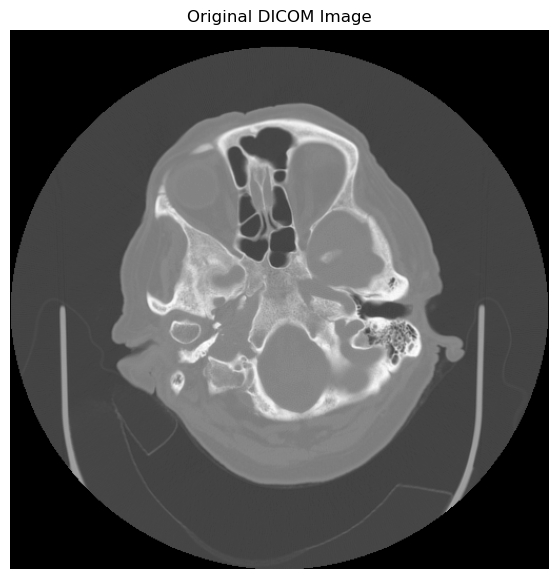

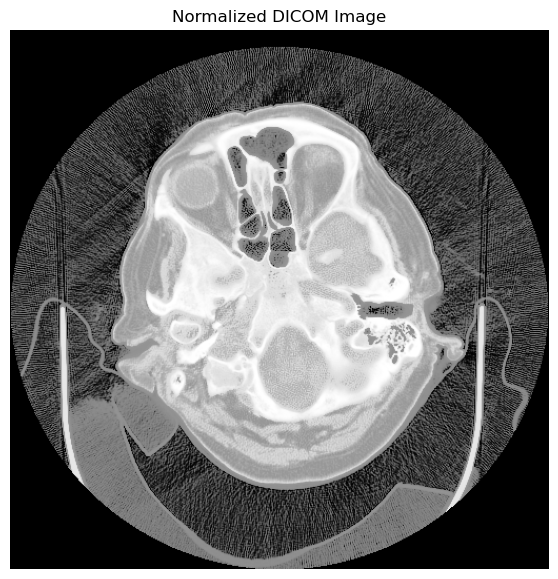

In [29]:
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(test_orgi[0],cmap='gray')
plt.title("Original DICOM Image")
plt.axis('off')
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(hist_orgi[0],cmap='gray')
plt.title("Normalized DICOM Image")
plt.axis('off')
plt.show()

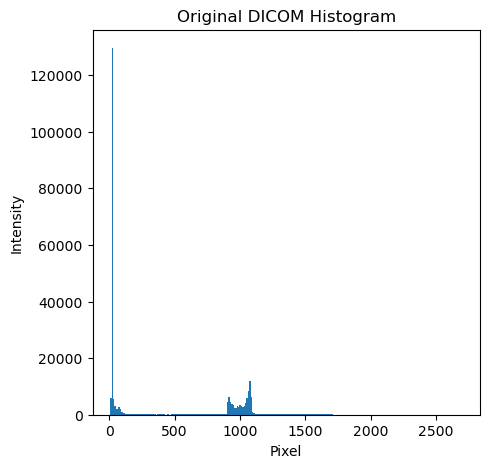

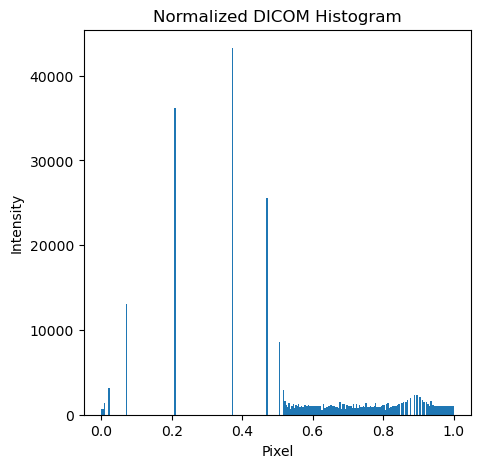

In [15]:
image = test_orgi[2]
normalized_image = hist_orgi[2]
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1 = plt.hist(image.ravel(), bins = 256)
plt.title("Original DICOM Histogram")
plt.xlabel("Pixel")
plt.ylabel("Intensity")
plt.show()

fig2, ax2 = plt.subplots(figsize=(5,5))
ax2 = plt.hist(normalized_image.ravel(), bins = 256)
plt.title("Normalized DICOM Histogram")
plt.xlabel("Pixel")
plt.ylabel("Intensity")
plt.show()

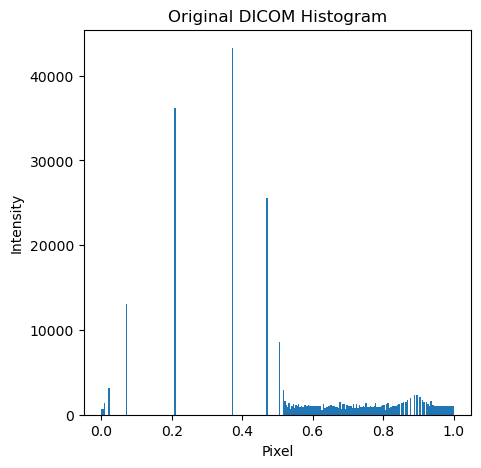

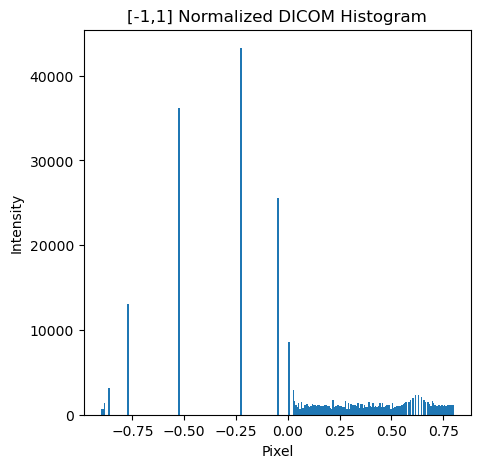

In [18]:
image = hist_orgi[2]
normalized_image = normalized_histo2[2]
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1 = plt.hist(image.ravel(), bins = 256)
plt.title("Original DICOM Histogram")
plt.xlabel("Pixel")
plt.ylabel("Intensity")
plt.show()


fig2, ax2 = plt.subplots(figsize=(5,5))
ax2 = plt.hist(normalized_image.ravel(), bins = 256)
plt.title("[-1,1] Normalized DICOM Histogram")
plt.xlabel("Pixel")
plt.ylabel("Intensity")

plt.show()
